<a href="https://colab.research.google.com/github/anishareddy04/ML_CSE_21206A/blob/main/auto%20grading%20using%20roberta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("AnReu/math_pretrained_roberta")

model = AutoModelForMaskedLM.from_pretrained("AnReu/math_pretrained_roberta")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/327 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.42M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/9.95k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/812 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/500M [00:00<?, ?B/s]

In [ ]:
pip install catboost scikit-learn pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 11.3 MB/s eta 0:00:00


In [ ]:
pip install pandas scikit-learn xgboost catboost tabulate

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from tabulate import tabulate
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from tabulate import tabulate
import matplotlib.pyplot as plt

In [ ]:
pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 530.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.6 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=1ad96e01f3db44e853115da74edc6f950bbf4b3d0352eb5f91ef7d657a2fbab5
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
import pandas as pd
model = SentenceTransformer('sentence-transformers/msmarco-roberta-base-v2')
dftrain =pd.read_excel('Ques.xlsx')
dftrain['EmbeddingsLM']=dftrain['Ques'].apply(lambda x:model.encode(str(x)))
Only_Ans=pd.DataFrame(dftrain['EmbeddingsLM'].tolist(),index=dftrain.index).add_prefix('embed_')

In [ ]:
Only_Ans.to_excel('roberta_Ques.xlsx', index=False)
from google.colab import files

files.download('roberta_Ques.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_excel('Ques_ans.xlsx')

# Identify NaN values
nan_values = df.isna().sum()

# Replace NaN values with a specific value (for example, replacing NaN with 0)
df.fillna(0, inplace=True)

# Or replace NaN values with mean, median, or any other calculated value
# For mean: df.fillna(df.mean(), inplace=True)
# For median: df.fillna(df.median(), inplace=True)

# Save the modified DataFrame back to a CSV file
df.to_excel('ques_ans.xlsx', index=False)


In [ ]:
import pandas as pd

# Load the Excel files into Pandas DataFrames
file1 = pd.read_excel('robertadata_Ques_ans.xlsx')
file2 = pd.read_excel('robertadata_Ques.xlsx')

result = file1.sub(file2)

# Save the result to a new Excel file
result.to_excel('Q_ASUB_Q_result.xlsx', index=False)





In [ ]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    # Collecting results
    results = []

    # Decision Tree
    tree_regressor = DecisionTreeRegressor()
    tree_regressor.fit(X_train, y_train)
    y_pred_test = tree_regressor.predict(X_test)
    y_pred_train = tree_regressor.predict(X_train)
    results.append(['Decision Tree', mean_squared_error(y_test, y_pred_test),
                    mean_squared_error(y_test, y_pred_test, squared=False),
                    mean_absolute_error(y_test, y_pred_test),
                    r2_score(y_test, y_pred_test),
                    mean_squared_error(y_train, y_pred_train),
                    mean_squared_error(y_train, y_pred_train, squared=False),
                    mean_absolute_error(y_train, y_pred_train),
                    r2_score(y_train, y_pred_train)])

    # Random Forest
    forest_regressor = RandomForestRegressor(n_estimators=100)
    forest_regressor.fit(X_train, y_train)
    predictions_forest_test = forest_regressor.predict(X_test)
    predictions_forest_train = forest_regressor.predict(X_train)
    results.append(['Random Forest', mean_squared_error(y_test, predictions_forest_test),
                    mean_squared_error(y_test, predictions_forest_test, squared=False),
                    mean_absolute_error(y_test, predictions_forest_test),
                    r2_score(y_test, predictions_forest_test),
                    mean_squared_error(y_train, predictions_forest_train),
                    mean_squared_error(y_train, predictions_forest_train, squared=False),
                    mean_absolute_error(y_train,predictions_forest_train),
                    r2_score(y_train, predictions_forest_train)])

    # SVM
    svm_regressor = SVR(kernel='rbf')
    svm_regressor.fit(X_train, y_train)
    y_train_pred_svm = svm_regressor.predict(X_train)
    y_test_pred_svm = svm_regressor.predict(X_test)
    results.append(['SVM', mean_squared_error(y_test, y_test_pred_svm),
                    mean_squared_error(y_test, y_test_pred_svm, squared=False),
                    mean_absolute_error(y_test, y_test_pred_svm),
                    r2_score(y_test, y_test_pred_svm),
                    mean_squared_error(y_train, y_train_pred_svm),
                    mean_squared_error(y_train, y_train_pred_svm, squared=False),
                    mean_absolute_error(y_train, y_train_pred_svm),
                    r2_score(y_train, y_train_pred_svm)])



    # Gradient Boosting Regression
    gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gb_regressor.fit(X_train, y_train)
    y_pred_gb_test = gb_regressor.predict(X_test)
    y_pred_gb_train = gb_regressor.predict(X_train)
    results.append(['Gradient Boosting', mean_squared_error(y_test, y_pred_gb_test),
                    mean_squared_error(y_test, y_pred_gb_test, squared=False),
                    mean_absolute_error(y_test, y_pred_gb_test),
                    r2_score(y_test, y_pred_gb_test),
                    mean_squared_error(y_train, y_pred_gb_train),
                    mean_squared_error(y_train, y_pred_gb_train, squared=False),
                    mean_absolute_error(y_train, y_pred_gb_train),
                    r2_score(y_train, y_pred_gb_train)])

    # KNN Regression
    knn_regressor = KNeighborsRegressor(n_neighbors=5)
    knn_regressor.fit(X_train, y_train)
    y_pred_knn_test = knn_regressor.predict(X_test)
    y_pred_knn_train = knn_regressor.predict(X_train)
    results.append(['KNN', mean_squared_error(y_test, y_pred_knn_test),
                    mean_squared_error(y_test, y_pred_knn_test, squared=False),
                    mean_absolute_error(y_test, y_pred_knn_test),
                    r2_score(y_test, y_pred_knn_test),
                    mean_squared_error(y_train, y_pred_knn_train),
                    mean_squared_error(y_train, y_pred_knn_train, squared=False),
                    mean_absolute_error(y_train, y_pred_knn_train),
                    r2_score(y_train, y_pred_knn_train)])

   # AdaBoost Regression
    adaboost_regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
    adaboost_regressor.fit(X_train, y_train)
    y_pred_adaboost_test = adaboost_regressor.predict(X_test)
    y_pred_adaboost_train = adaboost_regressor.predict(X_train)
    results.append(['AdaBoost', mean_squared_error(y_test, y_pred_adaboost_test),
                    mean_squared_error(y_test, y_pred_adaboost_test, squared=False),
                    mean_absolute_error(y_test, y_pred_adaboost_test),
                    r2_score(y_test, y_pred_adaboost_test),
                    mean_squared_error(y_train, y_pred_adaboost_train),
                    mean_squared_error(y_train, y_pred_adaboost_train, squared=False),
                    mean_absolute_error(y_train, y_pred_adaboost_train),
                    r2_score(y_train, y_pred_adaboost_train)])

    #xboost
    xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                           max_depth=5, alpha=10, n_estimators=10)

    xg_reg.fit(X_train, y_train)
    y_train_pred = xg_reg.predict(X_train)
    y_test_pred = xg_reg.predict(X_test)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    results.append(['XGBoost', test_mse, test_rmse, test_mae, test_r2,
                    train_mse, train_rmse, train_mae, train_r2])

    #catboost
    catboost_reg = CatBoostRegressor(iterations=100, depth=7, learning_rate=0.1, loss_function='RMSE', random_seed=random_state)

    # Train the model
    catboost_reg.fit(X_train, y_train, verbose=100)

    # Predict on the training set
    y_train_pred = catboost_reg.predict(X_train)

    # Predict on the test set
    y_test_pred = catboost_reg.predict(X_test)

    # Evaluate the model on training data
    train_rmse = mean_squared_error(y_train,y_train_pred, squared=False)
    train_mse  = mean_squared_error(y_train, y_train_pred)
    train_mae  = mean_absolute_error(y_train,y_train_pred)
    train_r2   = r2_score(y_train, y_train_pred)

    # Evaluate the model on testing data
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse =  mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    results.append(['CatBoost', test_mse, test_rmse, test_mae, test_r2,
                    train_mse, train_rmse, train_mae, train_r2])

# Create a DataFrame and return the table
    columns = ['Model', 'MSE (Test)', 'RMSE (Test)', 'MAE (Test)', 'R2 (Test)', 'MSE (Train)', 'RMSE (Train)', 'MAE (Train)', 'R2 (Train)']

    df_results = pd.DataFrame(results, columns=columns)

    return df_results



REGRESSION MODEL

In [ ]:
random_state = 42

def get_model_metrics(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return [model_name, mse, rmse, mae, r2]

def train_evaluate_models(X_train, X_test, y_train, y_test):
    results = []

    # Decision Tree
    tree_regressor = DecisionTreeRegressor()
    tree_regressor.fit(X_train, y_train)
    y_pred_tree = tree_regressor.predict(X_test)
    results.append(get_model_metrics("Decision Tree(test)", y_test, y_pred_tree))
    results.append(get_model_metrics("Decision Tree (Train)", y_train, tree_regressor.predict(X_train)))

    # Random Forest
    forest_regressor = RandomForestRegressor(n_estimators=100)
    forest_regressor.fit(X_train, y_train)
    y_pred_forest = forest_regressor.predict(X_test)
    results.append(get_model_metrics("Random Forest(test)", y_test, y_pred_forest))
    results.append(get_model_metrics("Random Forest (Train)", y_train, forest_regressor.predict(X_train)))

    # Support Vector Machine
    svm_regressor = SVR(kernel='rbf')
    svm_regressor.fit(X_train, y_train)
    y_pred_svm_train = svm_regressor.predict(X_train)
    y_pred_svm_test = svm_regressor.predict(X_test)
    results.append(get_model_metrics("SVM (Train)", y_train, y_pred_svm_train))
    results.append(get_model_metrics("SVM (Test)", y_test, y_pred_svm_test))

    #xboost
    xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                           max_depth=5, alpha=10, n_estimators=10)

    xg_reg.fit(X_train, y_train)
    y_train_pred = xg_reg.predict(X_train)
    y_test_pred = xg_reg.predict(X_test)
    results.append(get_model_metrics("Xboost (Train)", y_train, y_train_pred))
    results.append(get_model_metrics("Xboost (Test)", y_test, y_test_pred))

    #adaboost
    adaboost_regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
    adaboost_regressor.fit(X_train, y_train)
    y_pred_adaboost_test = adaboost_regressor.predict(X_test)
    y_pred_adaboost_train = adaboost_regressor.predict(X_train)
    results.append(get_model_metrics("adaboost (Train)", y_train, y_pred_adaboost_train))
    results.append(get_model_metrics("adaboost (Test)", y_test, y_pred_adaboost_test))

    #catboost
    catboost_reg = CatBoostRegressor(iterations=100, depth=7, learning_rate=0.1, loss_function='RMSE', random_seed=random_state)

    # Train the model
    catboost_reg.fit(X_train, y_train, verbose=100)

    # Predict on the training set
    y_train_pred = catboost_reg.predict(X_train)

    # Predict on the test set
    y_test_pred = catboost_reg.predict(X_test)
    results.append(get_model_metrics("catboost (Train)", y_train, y_train_pred))
    results.append(get_model_metrics("catboost (Test)", y_test, y_test_pred))

    # Gradient Boosting Regression
    gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gb_regressor.fit(X_train, y_train)
    y_pred_gb = gb_regressor.predict(X_test)
    results.append(get_model_metrics("Gradient Boosting(Test)", y_test, y_pred_gb))
    results.append(get_model_metrics("Gradient Boosting (Train)", y_train, gb_regressor.predict(X_train)))

    # KNN Regression
    knn_regressor = KNeighborsRegressor(n_neighbors=5)
    knn_regressor.fit(X_train, y_train)
    y_pred_knn = knn_regressor.predict(X_test)
    results.append(get_model_metrics("KNN(Test)", y_test, y_pred_knn))
    results.append(get_model_metrics("KNN (Train)", y_train, knn_regressor.predict(X_train)))

    return pd.DataFrame(results)

# Load the dataset
excel_file = "Only_ans.xlsx"
features_data = pd.read_excel("robertadata_Only_Ans.xlsx")
target_data = pd.read_excel(excel_file)
y = target_data['Average']
X = features_data

excel_file = "ques_ans.xlsx"
features_data = pd.read_excel("robertadata_Ques_ans.xlsx")
target_data = pd.read_excel(excel_file)
y1 = target_data['Average']
X1 = features_data

excel_file = "ques_ans.xlsx"
features_data = pd.read_excel("Q_ASUB_Q_result.xlsx")
target_data = pd.read_excel(excel_file)
y2 = target_data['Average']
X2 = features_data

excel_file = "Only_ans.xlsx"
features_data = pd.read_excel("AnssubQues_result.xlsx")
target_data = pd.read_excel(excel_file)
y3 = target_data['Average']
X3 = features_data


# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

print("Regression models for Only Answers")
df_results = train_and_evaluate_models(X_train, X_test, y_train, y_test)
df_results = df_results.round(4)
print(tabulate(df_results, headers='keys', tablefmt='pretty', showindex=False))

print("Regression models for Question and Answers")
df_results1 = train_and_evaluate_models(X_train1, X_test1, y_train1, y_test1)
df_results1 = df_results1.round(4)
print(tabulate(df_results1, headers='keys', tablefmt='pretty', showindex=False))

print("Regression models for Question and Answers - Question")
df_results2 = train_and_evaluate_models(X_train2, X_test2, y_train2, y_test2)
df_results2 = df_results2.round(4)
print(tabulate(df_results2, headers='keys', tablefmt='pretty', showindex=False))

print("Regression models for Answers - Question")
df_results3 = train_and_evaluate_models(X_train3, X_test3, y_train3, y_test3)
df_results3 = df_results3.round(4)
print(tabulate(df_results3, headers='keys', tablefmt='pretty', showindex=False))

Regression models for Only Answers


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0:	learn: 1.2501486	total: 1.24s	remaining: 2m 2s
99:	learn: 0.2923187	total: 52.7s	remaining: 0us
+-------------------+------------+-------------+------------+-----------+-------------+--------------+-------------+------------+
|       Model       | MSE (Test) | RMSE (Test) | MAE (Test) | R2 (Test) | MSE (Train) | RMSE (Train) | MAE (Train) | R2 (Train) |
+-------------------+------------+-------------+------------+-----------+-------------+--------------+-------------+------------+
|   Decision Tree   |   1.3647   |   1.1682    |   0.8139   |  0.1656   |   0.0049    |    0.0702    |   0.0168    |   0.9971   |
|   Random Forest   |   0.5929   |    0.77     |   0.5774   |  0.6375   |   0.0996    |    0.3156    |   0.2401    |   0.9412   |
|        SVM        |   0.5987   |   0.7737    |   0.5825   |  0.6339   |   0.5065    |    0.7117    |   0.4784    |   0.7008   |
| Gradient Boosting |   0.5883   |    0.767    |   0.5638   |  0.6403   |   0.0794    |    0.2818    |   0.2274    |   0.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0:	learn: 1.2435569	total: 550ms	remaining: 54.4s
99:	learn: 0.3395029	total: 36.8s	remaining: 0us
+-------------------+------------+-------------+------------+-----------+-------------+--------------+-------------+------------+
|       Model       | MSE (Test) | RMSE (Test) | MAE (Test) | R2 (Test) | MSE (Train) | RMSE (Train) | MAE (Train) | R2 (Train) |
+-------------------+------------+-------------+------------+-----------+-------------+--------------+-------------+------------+
|   Decision Tree   |   1.0334   |   1.0166    |   0.7458   |  0.3673   |   0.0113    |    0.1064    |   0.0257    |   0.9933   |
|   Random Forest   |   0.4677   |   0.6839    |   0.5486   |  0.7136   |   0.0963    |    0.3104    |   0.2309    |   0.9431   |
|        SVM        |   0.6414   |   0.8009    |   0.6084   |  0.6073   |   0.5631    |    0.7504    |   0.5413    |   0.6675   |
| Gradient Boosting |   0.509    |   0.7134    |   0.5797   |  0.6884   |   0.0936    |    0.306     |   0.2501    |   0.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0:	learn: 1.2457643	total: 488ms	remaining: 48.3s
99:	learn: 0.3229069	total: 41s	remaining: 0us
+-------------------+------------+-------------+------------+-----------+-------------+--------------+-------------+------------+
|       Model       | MSE (Test) | RMSE (Test) | MAE (Test) | R2 (Test) | MSE (Train) | RMSE (Train) | MAE (Train) | R2 (Train) |
+-------------------+------------+-------------+------------+-----------+-------------+--------------+-------------+------------+
|   Decision Tree   |   1.3133   |    1.146    |   0.8306   |  0.1959   |   0.0154    |    0.1241    |   0.0298    |   0.9909   |
|   Random Forest   |   0.5748   |   0.7582    |   0.5885   |  0.6481   |   0.1024    |    0.3201    |   0.2417    |   0.9395   |
|        SVM        |   0.5904   |   0.7684    |   0.5903   |  0.6385   |   0.4356    |     0.66     |   0.4576    |   0.7428   |
| Gradient Boosting |   0.5738   |   0.7575    |   0.5704   |  0.6487   |   0.0782    |    0.2797    |   0.2233    |   0.95

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0:	learn: 1.2493328	total: 1.58s	remaining: 2m 36s
99:	learn: 0.3035440	total: 37.2s	remaining: 0us
+-------------------+------------+-------------+------------+-----------+-------------+--------------+-------------+------------+
|       Model       | MSE (Test) | RMSE (Test) | MAE (Test) | R2 (Test) | MSE (Train) | RMSE (Train) | MAE (Train) | R2 (Train) |
+-------------------+------------+-------------+------------+-----------+-------------+--------------+-------------+------------+
|   Decision Tree   |   1.3298   |   1.1532    |   0.7815   |  0.1869   |   0.0049    |    0.0702    |   0.0168    |   0.9971   |
|   Random Forest   |    0.5     |   0.7071    |   0.5611   |  0.6943   |    0.098    |    0.3131    |   0.2414    |   0.9421   |
|        SVM        |   0.6189   |   0.7867    |   0.6035   |  0.6216   |   0.4559    |    0.6752    |   0.4433    |   0.7307   |
| Gradient Boosting |   0.4962   |   0.7044    |   0.5656   |  0.6966   |   0.0797    |    0.2823    |   0.2238    |   0

HYPERPARAMETER TUNING


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
from tabulate import tabulate

random_state = 42

def get_model_metrics(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return [model_name, mse, rmse, mae, r2]

def train_and_evaluate_models(X_train, X_test, y_train, y_test, model, param_dist):
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, random_state=random_state)
    random_search.fit(X_train, y_train)

    best_model = random_search.best_estimator_
    y_pred_test = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    results = get_model_metrics(f"{model.__class__.__name__} (Test)", y_test, y_pred_test)
    results.extend(get_model_metrics(f"{model.__class__.__name__} (Train)", y_train, y_pred_train))

    return results

def train_and_evaluate_all_models(X_train, X_test, y_train, y_test):
    results = []

    # Decision Tree
    tree_param_dist = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    results.append(train_and_evaluate_models(X_train, X_test, y_train, y_test, DecisionTreeRegressor(), tree_param_dist))

    # Random Forest
    forest_param_dist = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    results.append(train_and_evaluate_models(X_train, X_test, y_train, y_test, RandomForestRegressor(), forest_param_dist))

    # Support Vector Machine
    svm_param_dist = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
    results.append(train_and_evaluate_models(X_train, X_test, y_train, y_test, SVR(), svm_param_dist))

    # XGBoost
    xg_param_dist = {'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150]}
    results.append(train_and_evaluate_models(X_train, X_test, y_train, y_test, xgb.XGBRegressor(), xg_param_dist))

    # AdaBoost
    adaboost_param_dist = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]}
    results.append(train_and_evaluate_models(X_train, X_test, y_train, y_test, AdaBoostRegressor(base_estimator=DecisionTreeRegressor()), adaboost_param_dist))

    # CatBoost
    catboost_param_dist = {'iterations': [50, 100, 150], 'depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}
    results.append(train_and_evaluate_models(X_train, X_test, y_train, y_test, CatBoostRegressor(), catboost_param_dist))

    # Gradient Boosting
    gb_param_dist = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
    results.append(train_and_evaluate_models(X_train, X_test, y_train, y_test, GradientBoostingRegressor(), gb_param_dist))

    # KNN Regression
    knn_param_dist = {'n_neighbors': [3, 5, 7, 10]}
    results.append(train_and_evaluate_models(X_train, X_test, y_train, y_test, KNeighborsRegressor(), knn_param_dist))

    return pd.DataFrame(results)

# Load the dataset
# (Assuming the datasets are loaded and preprocessed as shown in your code)

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

print("Regression models for Only Answers")
df_results = train_and_evaluate_all_models(X_train, X_test, y_train, y_test)
df_results = df_results.round(4)
print(tabulate(df_results, headers='keys', tablefmt='pretty', showindex=False))

print("Regression models for Question and Answers")
df_results1 = train_and_evaluate_all_models(X_train1, X_test1, y_train1, y_test1)
df_results1 = df_results1.round(4)
print(tabulate(df_results1, headers='keys', tablefmt='pretty', showindex=False))

print("Regression models for Question and Answers - Question")
df_results2 = train_and_evaluate_all_models(X_train2, X_test2, y_train2, y_test2)
df_results2 = df_results2.round(4)
print(tabulate(df_results2, headers='keys', tablefmt='pretty', showindex=False))

print("Regression models for Answers - Question")
df_results3 = train_and_evaluate_all_models(X_train3, X_test3, y_train3, y_test3)
df_results3 = df_results3.round(4)
print(tabulate(df_results3, headers='keys', tablefmt='pretty', showindex=False))


Regression models for Only Answers


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and wil

Streaming output truncated to the last 5000 lines.
100:	learn: 0.3087051	total: 4.55s	remaining: 2.21s
101:	learn: 0.3058695	total: 4.6s	remaining: 2.16s
102:	learn: 0.3032016	total: 4.64s	remaining: 2.12s
103:	learn: 0.3024547	total: 4.69s	remaining: 2.07s
104:	learn: 0.3000489	total: 4.73s	remaining: 2.03s
105:	learn: 0.2970587	total: 4.78s	remaining: 1.98s
106:	learn: 0.2935434	total: 4.83s	remaining: 1.94s
107:	learn: 0.2911854	total: 4.87s	remaining: 1.89s
108:	learn: 0.2875578	total: 4.91s	remaining: 1.85s
109:	learn: 0.2863971	total: 4.95s	remaining: 1.8s
110:	learn: 0.2845393	total: 5s	remaining: 1.76s
111:	learn: 0.2822657	total: 5.05s	remaining: 1.71s
112:	learn: 0.2797440	total: 5.09s	remaining: 1.67s
113:	learn: 0.2790315	total: 5.13s	remaining: 1.62s
114:	learn: 0.2751903	total: 5.19s	remaining: 1.58s
115:	learn: 0.2719243	total: 5.23s	remaining: 1.53s
116:	learn: 0.2699685	total: 5.28s	remaining: 1.49s
117:	learn: 0.2682049	total: 5.32s	remaining: 1.44s
118:	learn: 0.2654

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


+----------------------------------+--------+--------+--------+--------+-----------------------------------+--------+--------+--------+--------+
|                0                 |   1    |   2    |   3    |   4    |                 5                 |   6    |   7    |   8    |   9    |
+----------------------------------+--------+--------+--------+--------+-----------------------------------+--------+--------+--------+--------+
|   DecisionTreeRegressor (Test)   | 1.2366 | 1.112  | 0.7678 | 0.2439 |   DecisionTreeRegressor (Train)   | 0.0818 | 0.286  | 0.1934 | 0.9517 |
|   RandomForestRegressor (Test)   | 0.6308 | 0.7942 | 0.5912 | 0.6143 |   RandomForestRegressor (Train)   | 0.1148 | 0.3389 | 0.2563 | 0.9322 |
|            SVR (Test)            | 0.5203 | 0.7214 | 0.5636 | 0.6818 |            SVR (Train)            | 0.1954 | 0.4421 | 0.2588 | 0.8846 |
|       XGBRegressor (Test)        | 0.5822 | 0.763  | 0.5546 | 0.644  |       XGBRegressor (Train)        | 0.0421 | 0.2052 | 0.1

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and wil

Streaming output truncated to the last 5000 lines.
100:	learn: 0.3168491	total: 5.72s	remaining: 2.78s
101:	learn: 0.3151821	total: 5.77s	remaining: 2.71s
102:	learn: 0.3143144	total: 5.82s	remaining: 2.65s
103:	learn: 0.3130402	total: 5.86s	remaining: 2.59s
104:	learn: 0.3106687	total: 5.91s	remaining: 2.53s
105:	learn: 0.3091660	total: 5.95s	remaining: 2.47s
106:	learn: 0.3077130	total: 5.99s	remaining: 2.41s
107:	learn: 0.3061611	total: 6.05s	remaining: 2.35s
108:	learn: 0.3039916	total: 6.09s	remaining: 2.29s
109:	learn: 0.3022454	total: 6.13s	remaining: 2.23s
110:	learn: 0.2998670	total: 6.18s	remaining: 2.17s
111:	learn: 0.2982598	total: 6.22s	remaining: 2.11s
112:	learn: 0.2969009	total: 6.28s	remaining: 2.05s
113:	learn: 0.2951051	total: 6.32s	remaining: 2s
114:	learn: 0.2938150	total: 6.36s	remaining: 1.94s
115:	learn: 0.2929880	total: 6.41s	remaining: 1.88s
116:	learn: 0.2904284	total: 6.46s	remaining: 1.82s
117:	learn: 0.2894857	total: 6.52s	remaining: 1.77s
118:	learn: 0.28

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


+----------------------------------+--------+--------+--------+--------+-----------------------------------+--------+--------+--------+--------+
|                0                 |   1    |   2    |   3    |   4    |                 5                 |   6    |   7    |   8    |   9    |
+----------------------------------+--------+--------+--------+--------+-----------------------------------+--------+--------+--------+--------+
|   DecisionTreeRegressor (Test)   | 0.9444 | 0.9718 | 0.6959 | 0.4218 |   DecisionTreeRegressor (Train)   | 0.0667 | 0.2583 | 0.1589 | 0.9606 |
|   RandomForestRegressor (Test)   | 0.4861 | 0.6972 | 0.5483 | 0.7024 |   RandomForestRegressor (Train)   | 0.1342 | 0.3663 | 0.2717 | 0.9208 |
|            SVR (Test)            | 0.5103 | 0.7144 | 0.549  | 0.6875 |            SVR (Train)            | 0.2784 | 0.5276 | 0.338  | 0.8356 |
|       XGBRegressor (Test)        | 0.4619 | 0.6796 | 0.5446 | 0.7172 |       XGBRegressor (Train)        | 0.0614 | 0.2477 | 0.1

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and wil

Streaming output truncated to the last 5000 lines.
100:	learn: 0.3225586	total: 5.67s	remaining: 2.75s
101:	learn: 0.3201334	total: 5.71s	remaining: 2.69s
102:	learn: 0.3183262	total: 5.76s	remaining: 2.63s
103:	learn: 0.3168243	total: 5.8s	remaining: 2.57s
104:	learn: 0.3130349	total: 5.85s	remaining: 2.51s
105:	learn: 0.3117243	total: 5.89s	remaining: 2.45s
106:	learn: 0.3086959	total: 5.94s	remaining: 2.39s
107:	learn: 0.3055461	total: 6s	remaining: 2.33s
108:	learn: 0.3023552	total: 6.05s	remaining: 2.27s
109:	learn: 0.3006405	total: 6.09s	remaining: 2.21s
110:	learn: 0.2983770	total: 6.13s	remaining: 2.15s
111:	learn: 0.2956903	total: 6.17s	remaining: 2.1s
112:	learn: 0.2929460	total: 6.23s	remaining: 2.04s
113:	learn: 0.2918865	total: 6.27s	remaining: 1.98s
114:	learn: 0.2895147	total: 6.31s	remaining: 1.92s
115:	learn: 0.2872993	total: 6.36s	remaining: 1.86s
116:	learn: 0.2851400	total: 6.4s	remaining: 1.81s
117:	learn: 0.2838105	total: 6.46s	remaining: 1.75s
118:	learn: 0.28234

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


+----------------------------------+--------+--------+--------+--------+-----------------------------------+--------+--------+--------+--------+
|                0                 |   1    |   2    |   3    |   4    |                 5                 |   6    |   7    |   8    |   9    |
+----------------------------------+--------+--------+--------+--------+-----------------------------------+--------+--------+--------+--------+
|   DecisionTreeRegressor (Test)   | 1.2145 | 1.1021 | 0.778  | 0.2564 |   DecisionTreeRegressor (Train)   | 0.0521 | 0.2282 | 0.1231 | 0.9692 |
|   RandomForestRegressor (Test)   | 0.5687 | 0.7541 | 0.5866 | 0.6518 |   RandomForestRegressor (Train)   | 0.1479 | 0.3846 | 0.2916 | 0.9127 |
|            SVR (Test)            | 0.5904 | 0.7684 | 0.5903 | 0.6385 |            SVR (Train)            | 0.4356 |  0.66  | 0.4576 | 0.7428 |
|       XGBRegressor (Test)        | 0.6046 | 0.7775 | 0.5909 | 0.6298 |       XGBRegressor (Train)        | 0.0339 | 0.1842 | 0.1

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and wil

Streaming output truncated to the last 5000 lines.
100:	learn: 0.3069917	total: 4.82s	remaining: 2.34s
101:	learn: 0.3038746	total: 4.87s	remaining: 2.29s
102:	learn: 0.3033844	total: 4.91s	remaining: 2.24s
103:	learn: 0.3016381	total: 4.96s	remaining: 2.2s
104:	learn: 0.2988248	total: 5.02s	remaining: 2.15s
105:	learn: 0.2971646	total: 5.07s	remaining: 2.1s
106:	learn: 0.2942150	total: 5.11s	remaining: 2.06s
107:	learn: 0.2911219	total: 5.16s	remaining: 2s
108:	learn: 0.2881953	total: 5.2s	remaining: 1.96s
109:	learn: 0.2869854	total: 5.26s	remaining: 1.91s
110:	learn: 0.2861683	total: 5.3s	remaining: 1.86s
111:	learn: 0.2832127	total: 5.34s	remaining: 1.81s
112:	learn: 0.2825734	total: 5.39s	remaining: 1.76s
113:	learn: 0.2797300	total: 5.45s	remaining: 1.72s
114:	learn: 0.2787643	total: 5.51s	remaining: 1.68s
115:	learn: 0.2762265	total: 5.55s	remaining: 1.63s
116:	learn: 0.2738278	total: 5.6s	remaining: 1.58s
117:	learn: 0.2712044	total: 5.64s	remaining: 1.53s
118:	learn: 0.2707237

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


+----------------------------------+--------+--------+--------+--------+-----------------------------------+--------+--------+--------+--------+
|                0                 |   1    |   2    |   3    |   4    |                 5                 |   6    |   7    |   8    |   9    |
+----------------------------------+--------+--------+--------+--------+-----------------------------------+--------+--------+--------+--------+
|   DecisionTreeRegressor (Test)   | 1.0943 | 1.0461 | 0.6886 | 0.3309 |   DecisionTreeRegressor (Train)   | 0.0238 | 0.1544 | 0.0759 | 0.9859 |
|   RandomForestRegressor (Test)   | 0.4905 | 0.7004 | 0.546  | 0.7001 |   RandomForestRegressor (Train)   | 0.1081 | 0.3287 | 0.2518 | 0.9362 |
|            SVR (Test)            | 0.4588 | 0.6773 | 0.5466 | 0.7195 |            SVR (Train)            | 0.159  | 0.3987 | 0.2365 | 0.9061 |
|       XGBRegressor (Test)        | 0.506  | 0.7113 | 0.5568 | 0.6906 |       XGBRegressor (Train)        | 0.0089 | 0.0942 | 0.0

k fold and hypertuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from tabulate import tabulate
import numpy as np

# Set random seed for reproducibility
random_state = 42

def cross_validate_model(model, X, y, scoring):
    cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)

    if scoring == 'neg_mean_squared_error':
        scores = -scores  # Change sign to convert to positive

    return np.mean(scores), np.std(scores)

def train_and_evaluate_models_cv(X_train, y_train, model_name):
    models = {
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(n_estimators=100),
        "SVM": SVR(kernel='rbf'),
        "Xboost": xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                                   max_depth=5, alpha=10, n_estimators=10),
        "adaboost": AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42),
        "catboost": CatBoostRegressor(iterations=100, depth=7, learning_rate=0.1, loss_function='RMSE', random_seed=random_state),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
        "KNN": KNeighborsRegressor(n_neighbors=5)
    }

    results = []

    for model_key, model in models.items():
        # Hyperparameter tuning using RandomizedSearchCV
        if model_key == "Random Forest":
            param_dist = {
                'n_estimators': [50, 100, 150, 200],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }

            random_search = RandomizedSearchCV(
                model,
                param_distributions=param_dist,
                n_iter=10,
                cv=KFold(n_splits=5, shuffle=True, random_state=random_state),
                scoring='neg_mean_squared_error',
                random_state=random_state
            )

            random_search.fit(X_train, y_train)

            # Use the best model found during RandomizedSearchCV
            model = random_search.best_estimator_

        mean_r2, std_r2 = cross_validate_model(model, X_train, y_train, 'r2')
        mean_rmse, std_rmse = cross_validate_model(model, X_train, y_train, 'neg_mean_squared_error')

        results.append([model_key + " (CV)", mean_r2, std_r2, mean_rmse, std_rmse])

    return pd.DataFrame(results, columns=["Model", "Mean R^2", "Std R^2", "Mean RMSE", "Std RMSE"])

# Perform cross-validation for each dataset and model combination
print("Cross-validation results for Only Answers")
df_results_cv = train_and_evaluate_models_cv(X, y, "Only Answers")
df_results_cv = df_results_cv.round(4)
print(tabulate(df_results_cv, headers='keys', tablefmt='pretty', showindex=False))

print("Cross-validation results for Question and Answers")
df_results1_cv = train_and_evaluate_models_cv(X1, y1, "Question and Answers")
df_results1_cv = df_results1_cv.round(4)
print(tabulate(df_results1_cv, headers='keys', tablefmt='pretty', showindex=False))

print("Cross-validation results for Question and Answers - Question")
df_results2_cv = train_and_evaluate_models_cv(X2, y2, "Question and Answers - Question")
df_results2_cv = df_results2_cv.round(4)
print(tabulate(df_results2_cv, headers='keys', tablefmt='pretty', showindex=False))

print("Cross-validation results for Answers - Question")
df_results3_cv = train_and_evaluate_models_cv(X3, y3, "Answers - Question")
df_results3_cv = df_results3_cv.round(4)
print(tabulate(df_results3_cv, headers='keys', tablefmt='pretty', showindex=False))


Cross-validation results for Only Answers


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

0:	learn: 1.2463965	total: 675ms	remaining: 1m 6s
1:	learn: 1.1975458	total: 1.01s	remaining: 49.4s
2:	learn: 1.1486242	total: 1.34s	remaining: 43.3s
3:	learn: 1.1043195	total: 1.71s	remaining: 41.1s
4:	learn: 1.0669029	total: 2.24s	remaining: 42.6s
5:	learn: 1.0327977	total: 2.88s	remaining: 45.1s
6:	learn: 1.0049850	total: 3.48s	remaining: 46.3s
7:	learn: 0.9736090	total: 4.02s	remaining: 46.3s
8:	learn: 0.9499199	total: 4.52s	remaining: 45.7s
9:	learn: 0.9207212	total: 4.88s	remaining: 43.9s
10:	learn: 0.9023305	total: 5.21s	remaining: 42.2s
11:	learn: 0.8769178	total: 5.55s	remaining: 40.7s
12:	learn: 0.8572918	total: 5.91s	remaining: 39.6s
13:	learn: 0.8334940	total: 6.25s	remaining: 38.4s
14:	learn: 0.8113674	total: 6.59s	remaining: 37.3s
15:	learn: 0.7928535	total: 6.94s	remaining: 36.5s
16:	learn: 0.7742466	total: 7.28s	remaining: 35.5s
17:	learn: 0.7580973	total: 7.61s	remaining: 34.7s
18:	learn: 0.7436365	total: 7.97s	remaining: 34s
19:	learn: 0.7320118	total: 8.32s	remaining

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

0:	learn: 1.2340755	total: 812ms	remaining: 1m 20s
1:	learn: 1.1775037	total: 1.32s	remaining: 1m 4s
2:	learn: 1.1274331	total: 1.67s	remaining: 53.9s
3:	learn: 1.0813979	total: 2.02s	remaining: 48.4s
4:	learn: 1.0365610	total: 2.35s	remaining: 44.8s
5:	learn: 1.0038464	total: 2.69s	remaining: 42.2s
6:	learn: 0.9663863	total: 3.05s	remaining: 40.5s
7:	learn: 0.9358101	total: 3.38s	remaining: 38.9s
8:	learn: 0.9071960	total: 3.71s	remaining: 37.6s
9:	learn: 0.8818815	total: 4.07s	remaining: 36.6s
10:	learn: 0.8550938	total: 4.41s	remaining: 35.7s
11:	learn: 0.8339468	total: 4.75s	remaining: 34.8s
12:	learn: 0.8156395	total: 5.09s	remaining: 34.1s
13:	learn: 0.7955239	total: 5.44s	remaining: 33.4s
14:	learn: 0.7762243	total: 5.78s	remaining: 32.7s
15:	learn: 0.7593298	total: 6.13s	remaining: 32.2s
16:	learn: 0.7452559	total: 6.46s	remaining: 31.6s
17:	learn: 0.7318303	total: 6.81s	remaining: 31s
18:	learn: 0.7162612	total: 7.16s	remaining: 30.5s
19:	learn: 0.7027131	total: 7.5s	remaining

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

0:	learn: 1.2374226	total: 490ms	remaining: 48.5s
1:	learn: 1.1850815	total: 843ms	remaining: 41.3s
2:	learn: 1.1373175	total: 1.18s	remaining: 38.1s
3:	learn: 1.0955454	total: 1.53s	remaining: 36.7s
4:	learn: 1.0517076	total: 1.88s	remaining: 35.8s
5:	learn: 1.0128606	total: 2.22s	remaining: 34.8s
6:	learn: 0.9748942	total: 2.55s	remaining: 33.9s
7:	learn: 0.9420164	total: 2.91s	remaining: 33.5s
8:	learn: 0.9120873	total: 3.25s	remaining: 32.9s
9:	learn: 0.8865340	total: 3.59s	remaining: 32.3s
10:	learn: 0.8600046	total: 3.95s	remaining: 31.9s
11:	learn: 0.8386844	total: 4.29s	remaining: 31.5s
12:	learn: 0.8144334	total: 4.63s	remaining: 31s
13:	learn: 0.7953892	total: 4.99s	remaining: 30.7s
14:	learn: 0.7785999	total: 5.32s	remaining: 30.2s
15:	learn: 0.7629810	total: 5.65s	remaining: 29.7s
16:	learn: 0.7483472	total: 6.01s	remaining: 29.4s
17:	learn: 0.7282491	total: 6.52s	remaining: 29.7s
18:	learn: 0.7162662	total: 7.13s	remaining: 30.4s
19:	learn: 0.7013726	total: 7.74s	remaining

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

0:	learn: 1.2365422	total: 504ms	remaining: 49.9s
1:	learn: 1.1832165	total: 837ms	remaining: 41s
2:	learn: 1.1417615	total: 1.17s	remaining: 37.8s
3:	learn: 1.0926917	total: 1.52s	remaining: 36.5s
4:	learn: 1.0534690	total: 1.86s	remaining: 35.3s
5:	learn: 1.0191527	total: 2.19s	remaining: 34.4s
6:	learn: 0.9898879	total: 2.54s	remaining: 33.8s
7:	learn: 0.9600671	total: 2.88s	remaining: 33.1s
8:	learn: 0.9352984	total: 3.21s	remaining: 32.4s
9:	learn: 0.9061924	total: 3.56s	remaining: 32.1s
10:	learn: 0.8851217	total: 3.91s	remaining: 31.6s
11:	learn: 0.8639613	total: 4.24s	remaining: 31.1s
12:	learn: 0.8467353	total: 4.59s	remaining: 30.7s
13:	learn: 0.8220049	total: 4.93s	remaining: 30.3s
14:	learn: 0.8055205	total: 5.27s	remaining: 29.9s
15:	learn: 0.7890903	total: 5.62s	remaining: 29.5s
16:	learn: 0.7696703	total: 5.96s	remaining: 29.1s
17:	learn: 0.7543431	total: 6.29s	remaining: 28.6s
18:	learn: 0.7404328	total: 6.65s	remaining: 28.4s
19:	learn: 0.7252372	total: 7s	remaining: 2

In [ ]:
pip install matplotlib seaborn

PLOTTING

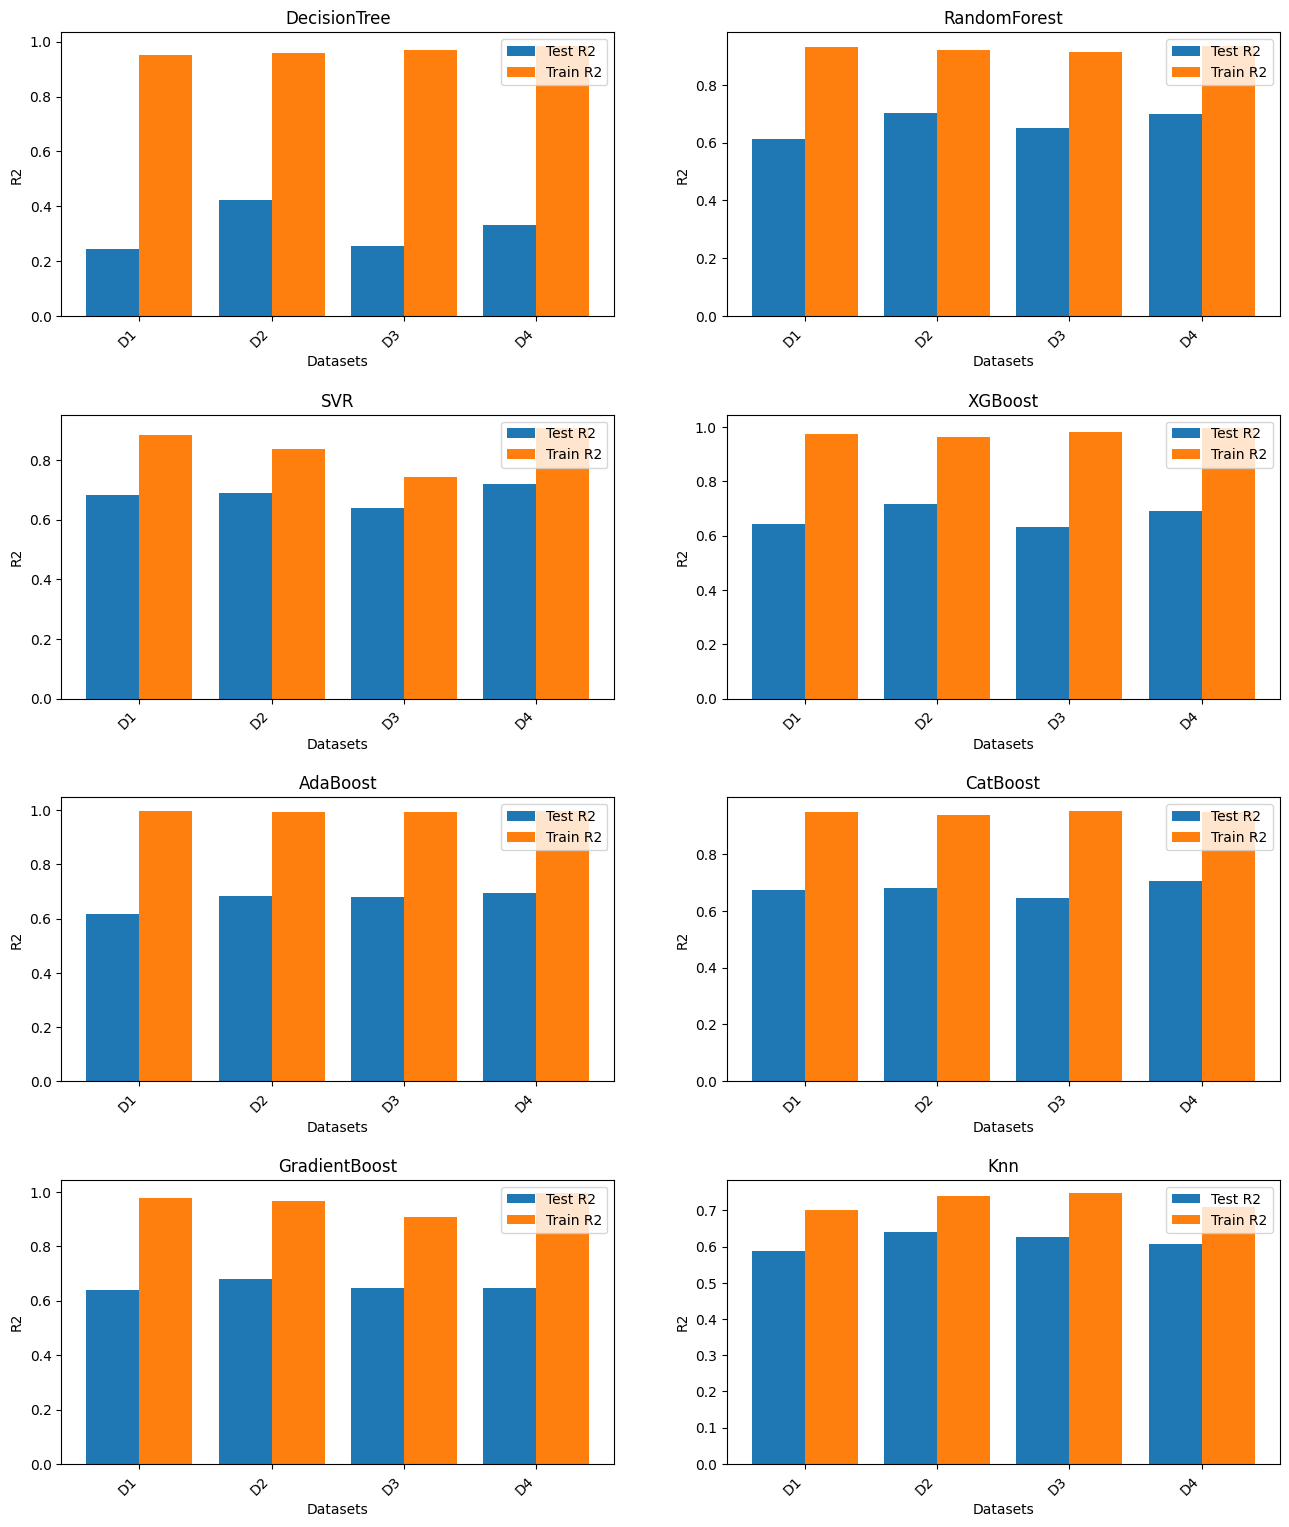

In [ ]:
import matplotlib.pyplot as plt

decision_tree = {
    'Model': 'DecisionTree',
    'Test_R2': [0.2439, 0.4218, 0.2564, 0.3309],
    'Train_R2': [0.9517, 0.9606, 0.9692, 0.9859]
}

random_forest = {
    'Model': 'RandomForest',
    'Test_R2': [0.6143, 0.7024, 0.6518, 0.7001],
    'Train_R2': [0.9322, 0.9208, 0.9127, 0.9362]
}

SVR = {
    'Model': 'SVR',
    'Test_R2': [0.6818, 0.6875, 0.6385, 0.7195],
    'Train_R2': [0.8846, 0.8356, 0.7428, 0.9061]
}

XGBoost = {
    'Model': 'XGBoost',
    'Test_R2': [0.644, 0.7172, 0.6298, 0.6906],
    'Train_R2': [0.9751, 0.9638, 0.98, 0.9948]
}

AdaBoost = {
    'Model': 'AdaBoost',
    'Test_R2': [0.6164, 0.6838, 0.6778, 0.6959],
    'Train_R2': [0.9967, 0.992, 0.9909, 0.9969]
}
CatBoost = {
    'Model': 'CatBoost',
    'Test_R2': [0.6744, 0.6793, 0.6455, 0.7041],
    'Train_R2': [0.9495, 0.9372, 0.952, 0.9475]
}

GradientBoost = {
    'Model': 'GradientBoost',
    'Test_R2': [0.6407, 0.6805, 0.6469, 0.6449],
    'Train_R2': [0.9785, 0.9659, 0.9086, 0.9941]
}
Knn = {
    'Model': 'Knn',
    'Test_R2': [0.5877, 0.6408, 0.625, 0.6062],
    'Train_R2': [0.7, 0.7402, 0.7463, 0.7094]
}

models = [decision_tree, random_forest, SVR, XGBoost, AdaBoost, CatBoost, GradientBoost, Knn]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
fig.tight_layout(pad=5.0)

for idx, model in enumerate(models):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]

    x = range(len(model['Test_R2']))
    width = 0.4

    ax.bar([i - width/2 for i in x], model['Test_R2'], width, label='Test R2')
    ax.bar([i + width/2 for i in x], model['Train_R2'], width, label='Train R2')

    ax.set_xticks(x)
    ax.set_xticklabels(['D1', 'D2', 'D3', 'D4'], rotation=45, ha="right")
    ax.set_xlabel('Datasets')
    ax.set_ylabel('R2')
    ax.set_title(model['Model'])
    ax.legend()

plt.show()


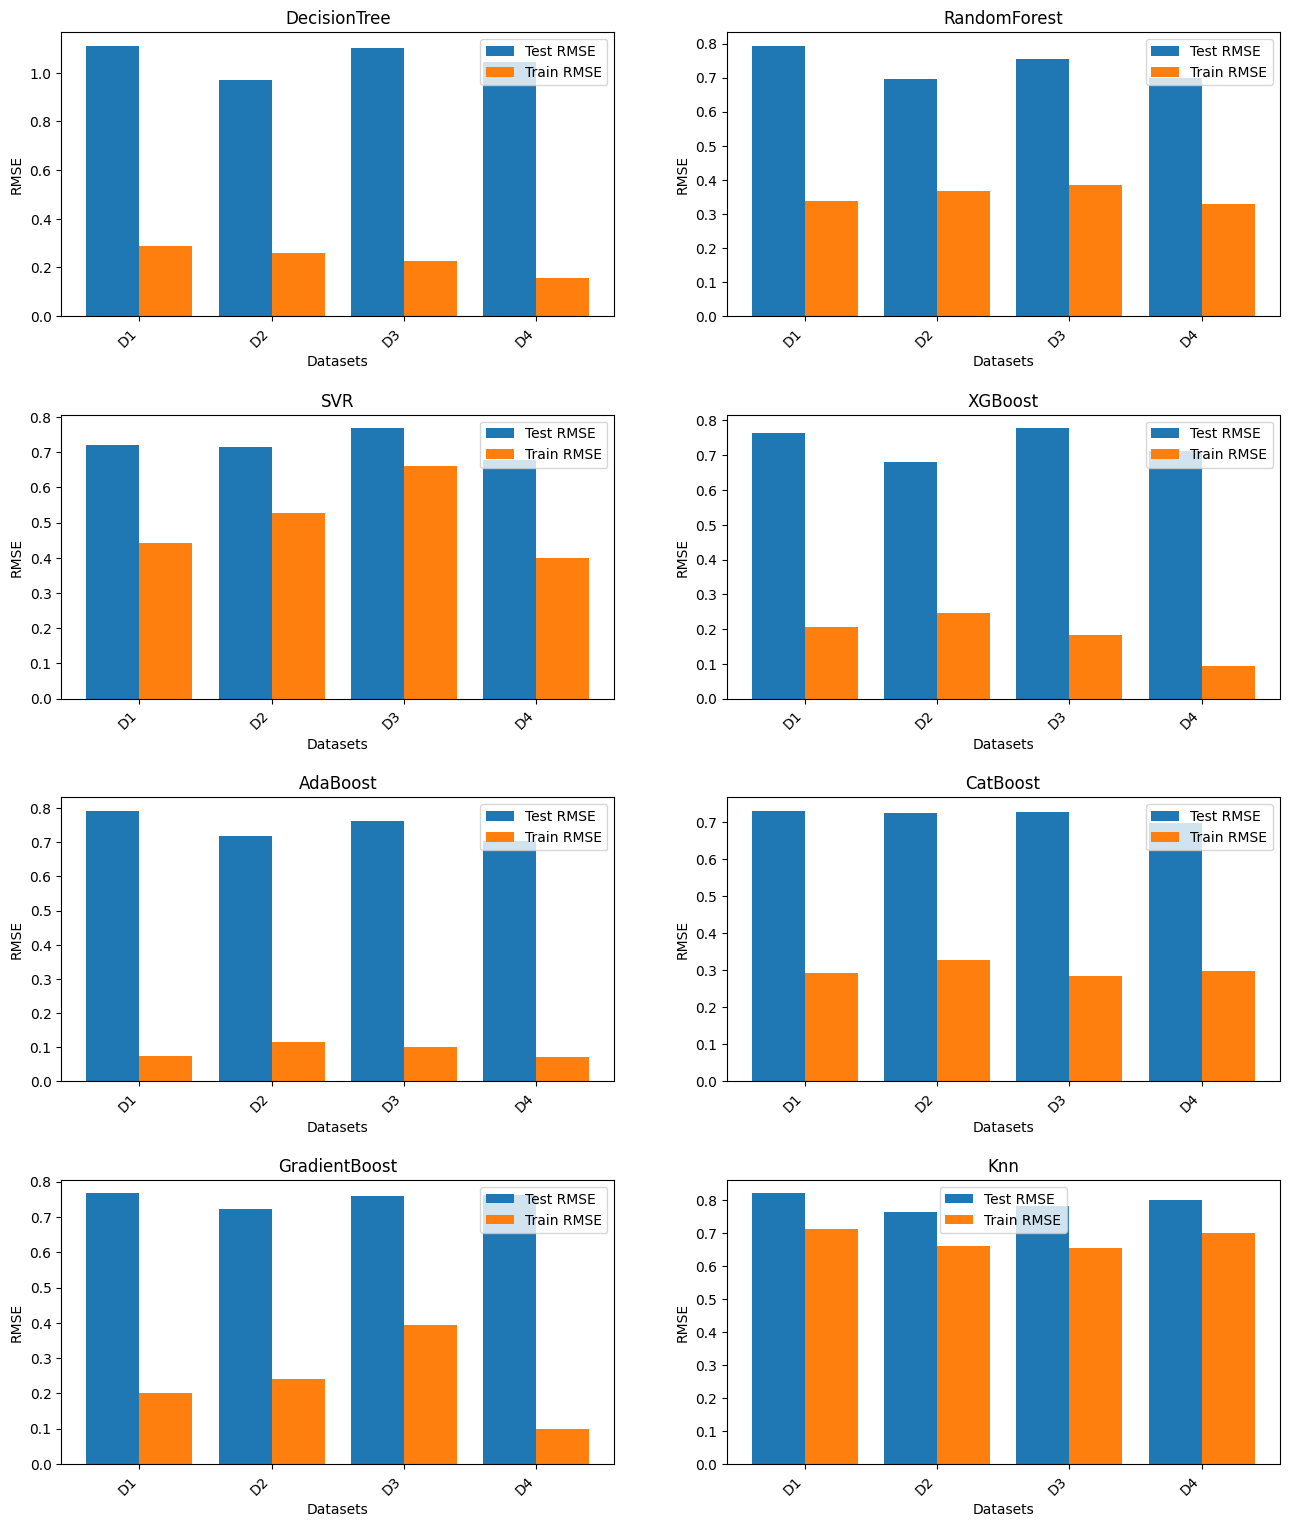

In [ ]:
import matplotlib.pyplot as plt

decision_tree = {
    'Model': 'DecisionTree',
    'Test_RMSE': [1.112, 0.9718, 1.1021, 1.0461],
    'Train_RMSE': [0.286, 0.2583, 0.2282, 0.1544]
}

random_forest = {
    'Model': 'RandomForest',
    'Test_RMSE': [0.7942, 0.6972, 0.7541, 0.7004],
    'Train_RMSE': [0.3389, 0.3663, 0.3846, 0.3287]
}

SVR = {
    'Model': 'SVR',
    'Test_RMSE': [0.7214, 0.7144, 0.7684, 0.6773],
    'Train_RMSE': [0.4421, 0.5276, 0.66, 0.3987]
}

XGBoost = {
    'Model': 'XGBoost',
    'Test_RMSE': [0.763, 0.6796, 0.7775, 0.7113],
    'Train_RMSE': [0.2052, 0.2477, 0.1842, 0.0942]
}

AdaBoost = {
    'Model': 'AdaBoost',
    'Test_RMSE': [0.7921, 0.7187, 0.7621, 0.7052],
    'Train_RMSE': [0.0743, 0.1162, 0.1001, 0.0726]
}
CatBoost = {
    'Model': 'CatBoost',
    'Test_RMSE': [0.7298, 0.7238, 0.7254, 0.6957],
    'Train_RMSE': [0.2925, 0.3261, 0.2852, 0.2982]
}

GradientBoost = {
    'Model': 'GradientBoost',
    'Test_RMSE': [0.7666, 0.7224, 0.7594, 0.7621],
    'Train_RMSE': [0.2025, 0.2404, 0.3933, 0.1001]
}
Knn = {
    'Model': 'Knn',
    'Test_RMSE': [0.8212, 0.766, 0.7826, 0.8025],
    'Train_RMSE': [0.7127, 0.6632, 0.6554, 0.7014]
}

models = [decision_tree, random_forest, SVR, XGBoost, AdaBoost, CatBoost, GradientBoost, Knn]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
fig.tight_layout(pad=5.0)

for idx, model in enumerate(models):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]

    x = range(len(model['Test_RMSE']))
    width = 0.4

    ax.bar([i - width/2 for i in x], model['Test_RMSE'], width, label='Test RMSE')
    ax.bar([i + width/2 for i in x], model['Train_RMSE'], width, label='Train RMSE')

    ax.set_xticks(x)
    ax.set_xticklabels(['D1', 'D2', 'D3', 'D4'], rotation=45, ha="right")
    ax.set_xlabel('Datasets')
    ax.set_ylabel('RMSE')
    ax.set_title(model['Model'])
    ax.legend()

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional: For a more visually appealing plot


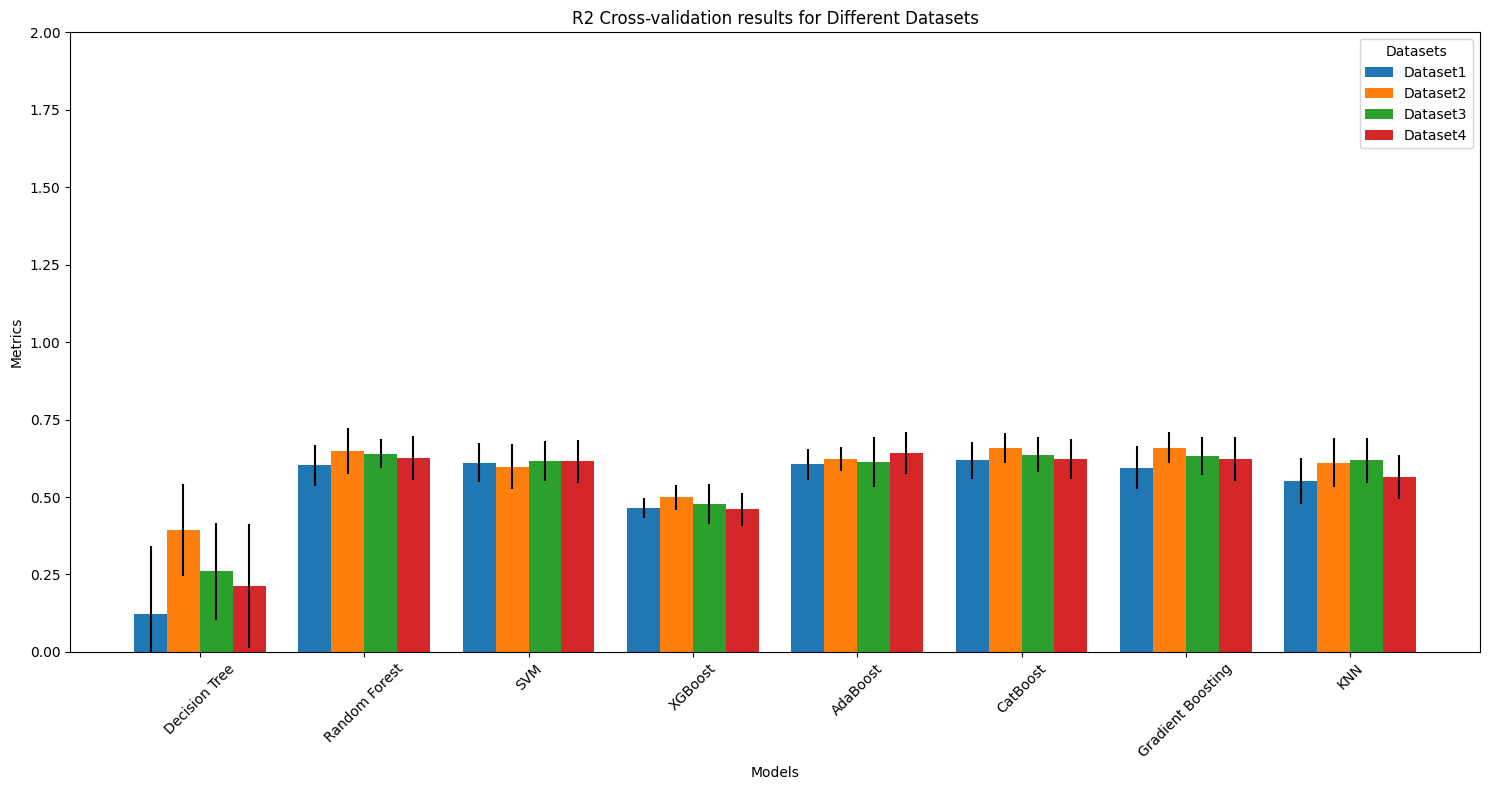

In [ ]:
#R2

# Assuming the data is structured as a dictionary
data = {
    'MODEL': ['Decision Tree', 'Random Forest', 'SVM', 'XGBoost', 'AdaBoost', 'CatBoost', 'Gradient Boosting', 'KNN'],
    'Dataset1_mean_r2': [0.122,0.6018,0.6112,0.4655,0.6056,0.6188,0.5949,0.551],
    'Dataset1_std_r2': [0.2213,0.0676,0.0634,0.0324,0.0508,0.0603,0.069,0.0737],
    'Dataset2_mean_r2': [0.3932,0.6475,0.5982,0.4993,0.6228,0.6594,0.6593,0.6112],
    'Dataset2_std_r2': [0.1495,0.0741,0.0715,0.0402,0.0395,0.0486,0.0505,0.0783],
    'Dataset3_mean_r2': [0.2601,0.64,0.6153,0.4779,0.6126,0.6367,0.6316,0.6181],
    'Dataset3_std_r2': [0.1562,0.0472,0.0648,0.0638,0.0813,0.0573,0.0614,0.0727],
    'Dataset4_mean_r2': [0.2119,0.6261,0.6148,0.4599,0.6418,0.6217,0.6223,0.5651],
    'Dataset4_std_r2': [0.2002,0.0704,0.0701,0.0522,0.0669,0.0649,0.072,0.0709],
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Set 'MODEL' column as the index for easier plotting
df.set_index('MODEL', inplace=True)

# Prepare data for plotting
datasets = ['Dataset1', 'Dataset2', 'Dataset3', 'Dataset4']
x = np.arange(len(df))  # the label locations
width = 0.2  # the width of the bars

plt.figure(figsize=(15, 8))

for i, dataset in enumerate(datasets):
    mean_col = f'{dataset}_mean_r2'
    std_col = f'{dataset}_std_r2'
    plt.bar(x + i * width, df[mean_col], yerr=df[std_col], width=width, label=f'{dataset.capitalize()}')

plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('R2 Cross-validation results for Different Datasets')
plt.xticks(x + 1.5 * width, df.index, rotation=45)
plt.legend(title='Datasets')
plt.ylim(0, 2)  # Set the y-axis limits from 0 to 1
plt.tight_layout()
plt.show()




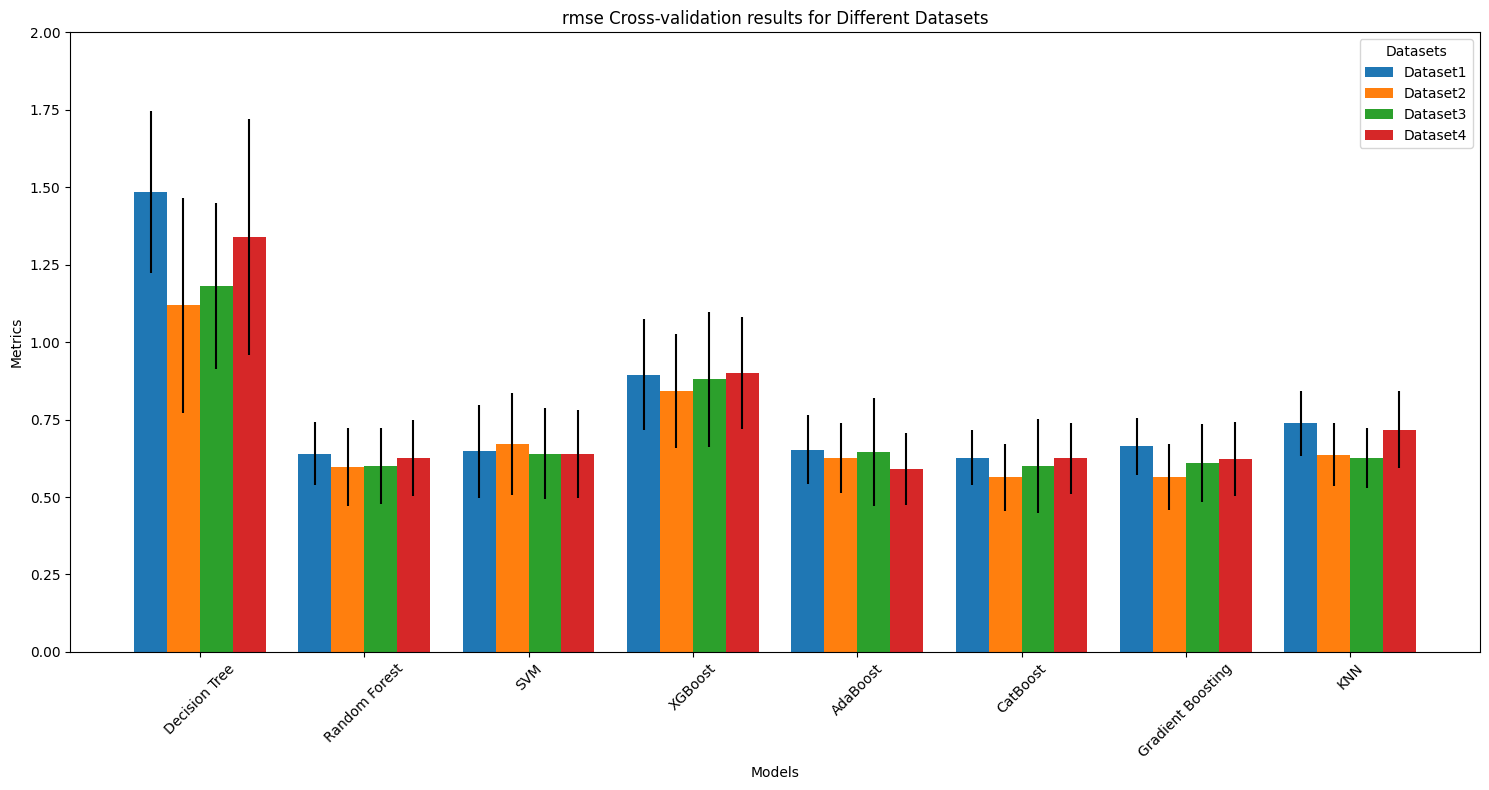

In [ ]:
# Assuming the data is structured as a dictionary
data = {
    'MODEL': ['Decision Tree', 'Random Forest', 'SVM', 'XGBoost', 'AdaBoost', 'CatBoost', 'Gradient Boosting', 'KNN'],
    'Dataset1_mean_rmse': [1.484,0.6401,0.6472,0.8946,0.6531,0.6263,0.6643,0.7376],
    'Dataset1_std_rmse': [0.2619,0.1016,0.1497,0.1796,0.11179,0.0888,0.0918,0.1037],
    'Dataset2_mean_rmse': [1.1197,0.5972,0.6708,0.8411,0.6267,0.5641,0.5643,0.636],
    'Dataset2_std_rmse': [0.347,0.1265,0.1636,0.1835,0.1126,0.1082,0.1062,0.1019],
    'Dataset3_mean_rmse': [1.1812,0.5997,0.6401,0.8794,0.6448,0.5997,0.6101,0.6259],
    'Dataset3_std_rmse': [0.2682,0.1223,0.1471,0.2185,0.1742,0.1509,0.1268,0.0961],
    'Dataset4_mean_rmse': [1.3401,0.6256,0.6383,0.9013,0.5914,0.6248,0.6218,0.7178],
    'Dataset4_std_rmse': [0.3805,0.1237,0.1414,0.1803,0.1162,0.1152,0.1193,0.125],
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Set 'MODEL' column as the index for easier plotting
df.set_index('MODEL', inplace=True)

# Prepare data for plotting
datasets = ['Dataset1', 'Dataset2', 'Dataset3', 'Dataset4']
x = np.arange(len(df))  # the label locations
width = 0.2  # the width of the bars

plt.figure(figsize=(15, 8))

for i, dataset in enumerate(datasets):
    mean_col = f'{dataset}_mean_rmse'
    std_col = f'{dataset}_std_rmse'
    plt.bar(x + i * width, df[mean_col], yerr=df[std_col], width=width, label=f'{dataset.capitalize()}')

plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('rmse Cross-validation results for Different Datasets')
plt.xticks(x + 1.5 * width, df.index, rotation=45)
plt.legend(title='Datasets')
plt.ylim(0, 2)  # Set the y-axis limits from 0 to 1
plt.tight_layout()
plt.show()